1. 폴더 내 3개 데이터를 불러와 아래와 같이 변환 하시오.
    - 기간은 파일 상단에 적힌 기간월을 작성
    - Column 명 '합계'는 앞에 공백이 존재 ' 합계'
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/2a570022-4b51-46a3-9808-27bbed895639/bc4354e5-33e3-4b69-9c6e-a56c5737156b/Untitled.png)
    
2. '지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.
3. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.
4. 앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .
5. '상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.
6. 한 회사의 제품 불량률이 10%일 때, 30개의 제품을 검사했을 때 5개 이상의 불량품이 나올 확률을 계산하세요.
7. 어느 고객센터에 하루 평균 3번의 문의가 온다고 할 때, 하루에 문의가 5번 이상 올 확률을 계산하세요.
8. '01_Data.csv' 파일의 'Amount_Month' 데이터를 표준화하여 표준 정규 분포로 변환한 후, 그래프를 그리세요.

In [29]:
import pandas as pd
box=[]
for i in range(6,9):
    a=pd.read_excel(fr"C:\Users\hanjw\Desktop\python\실습파일\07_ERP1\기간별상품매출현황_20230{i}.xlsx", header=2)
    box.append(a)
df=pd.concat(box)


In [32]:
df2= pd.melt(df, id_vars= ['순번','상품코드','상품명'," 합계"],var_name='지점',
        value_name= '판매량')
df2=df2.dropna()
df2=df2[['순번','상품코드','상품명',' 합계','지점','판매량']]## 순서 배치
df2

,순번,상품코드,상품명,합계,지점,판매량
2,1.0,1.801828e+06,자연숨결 식약처 허가 초미세먼지 마스크 대형 60매(KF94),65402,(1154)의정부점,174
3,2.0,1.801859e+06,블루방역황사마스크 65매 KF94,1,(1154)의정부점,0
4,3.0,4.078618e+07,클린위즈 매직클리너 얼룩제거 세트,2158,(1154)의정부점,4
5,4.0,4.100136e+07,트루마리 순수휴지 30미터 90롤,3649,(1154)의정부점,14
6,5.0,8.800532e+07,자연숨결 식약처 허가 초미세먼지 마스크 대형30매 + 중형 30매(KF94),1,(1154)의정부점,0
...,...,...,...,...,...,...
244027,126.0,8.801858e+12,[쨍하고해뜰집]제습제풀세트(다용도제습제30통+지시겔1봉),653,(4548)NBFC칠곡석적점,0
244028,127.0,8.801858e+12,[리얼뽀송이]제습제세트,3233,(4548)NBFC칠곡석적점,0
244029,128.0,8.801858e+12,[미라클워터]다목적세정제17종괴물용량풀세트,8433,(4548)NBFC칠곡석적점,0
244030,129.0,8.801858e+12,[쨍하고해뜰집]지시겔1봉(20개),135839,(4548)NBFC칠곡석적점,0


In [33]:
df2=df2.dropna()
df2['판매량']=df2['판매량'].astype("int")

### 지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.

In [38]:
df2.pivot_table(index= '지점', values= '판매량', aggfunc= 'sum').sort_values('판매량', ascending=False).head(2)

,판매량
지점,
(610)부천점,67612
(600)안양점,62987


### 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오.

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
boocheon= df2[df2['지점']=='(610)부천점']["판매량"]
anyang= df2[df2['지점']=='(600)안양점']["판매량"]
stats.normaltest(boocheon)
stats.normaltest(anyang)

#부천, 안양 둘다 정규성을 따르지 않는다

NormaltestResult(statistic=291.630042482356, pvalue=4.71347161815466e-64)

### 앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .

In [46]:
stats.ranksums(boocheon,anyang)
#서로의 중앙값이 같다고 볼 수 있다


RanksumsResult(statistic=0.23404972309949237, pvalue=0.8149463770358858)

### '상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.

In [58]:
def classy (x):
    if "휴지" in x:
        return "휴지"
    elif "마스크" in x:
        return "마스크"
    else:
        return "기타"
df2['상품분류']=df2['상품명'].apply(classy)
napkin= df2[df2['상품분류']=='휴지']['판매량']
mask=df2[df2['상품분류']=='마스크']['판매량']

stats.ranksums(napkin, mask)


RanksumsResult(statistic=-14.193416467479825, pvalue=1.0063403187290814e-45)

### 한 회사의 제품 불량률이 10%일 때, 30개의 제품을 검사했을 때 5개 이상의 불량품이 나올 확률을 계산하세요.

In [61]:
from scipy.special import comb
box=0
for n in range (5,31):
    a= comb(30,n)*((0.1)**n) *((0.9)**(30-n))
    box=box+a
box

0.17549487903389513

### 어느 고객센터에 하루 평균 3번의 문의가 온다고 할 때, 하루에 문의가 5번 이상 올 확률을 계산하세요.

In [65]:
call= 3 #하루평균 call 수
time = 1#기간
target= 5
box=0
for n in range(0,5):
    a=stats.poisson.pmf(n, call * time)
    box+=a
1-box

0.18473675547622792

### '01_Data.csv' 파일의 'Amount_Month' 데이터를 표준화하여 표준 정규 분포로 변환한 후, 그래프를 그리세요.

In [74]:
df3= pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\01_Data.csv")
mean= df3["Amount_Month"].mean()
std=df3["Amount_Month"].std()
data= df3['Amount_Month']
z= (data-data.mean())/data.std()

<AxesSubplot:xlabel='Amount_Month', ylabel='Count'>

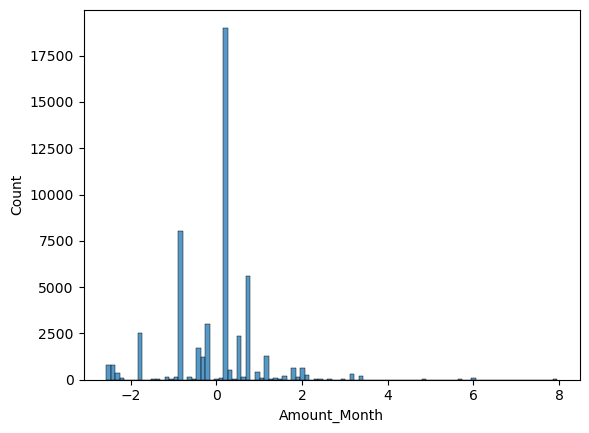

In [77]:
sns.histplot(z,bins=100)